# Exercises B
_Version: February 14, 2022, see_ [PyEcon.org](https://pyecon.org).

### Exercise 1: NHL Hockey
The file `nhl1617.txt` contains data of all (non-goalie) players in the NHL who had at least some _ice time_, i.e. playing time, in the 2016/2017 regular season - without play-offs. Load the CSV data of the file `nhl1617.txt` in Python using `open` and further string transformations (_see below_). Try to cope with the huge string and allocate the information to a dictionary. Use the column names of the dataset as keys for the dictionary.

Solve these tasks using only a dictionary consisting of lists but **not using** _pandas_:

1. How many players have been recorded?
1. A column _points_ ("P") is missing in the data. The number of points of a player is defined as the sum of his _goals_ ("G") and _assists_ ("A"). Add the points to your dictionary.
1. Who is the top scorer in terms of points?
1. How many German (non-goalie) players had some ice time in there 2016/2017 regular season? _Hint: Nationality of a player can be found in the dictionary entry "Nat". Germans are indicated by "DEU"._
1. What are their names? *Hint: Names can be found in th entry "Last_Name" and "First_Name".*
1. Who performed best among the German players in terms of points ("P")?
1. How many points ("P") did he have?
1. How well did he perform in the entire league? Put differently, what was his rank in terms of points?
1. Find the top ten scorers (in terms of points) and print them including their number of point and their respective team.
1. What are the three countries with the most players originating from?

If you feel comfortable looping through dictionaries and lists, re-implement your codes **using** _pandas_.

In [260]:
with open("data/nhl1617.txt") as f:
    data = f.read()
data = data.replace('"', '')
data = data.splitlines()
var_names = data[0]
var_names = var_names.rsplit(";")
data.pop(0)
NHL = {}
for keys in var_names:
    NHL[keys] = []
for line in data:
    line = line.rsplit(';')
    for info, keys in zip(line, NHL):
        NHL[keys].append(info)
NHL["Last_Name"][:10]

['Abbott',
 'Abdelkader',
 'Aberg',
 'Acciari',
 'Agostino',
 'Aho',
 'Alzner',
 'Anderson',
 'Andersson',
 'Andreoff']

In [261]:
NHL.keys()

dict_keys(['Born', 'City', 'Cntry', 'Nat', 'Ht', 'Wt', 'Last_Name', 'First_Name', 'Position', 'Team', 'GP', 'G', 'A', 'TOI', 'TOI_GP'])

In [262]:
# Number fo players
n = len(NHL['Last_Name'])
print(f'Number of players accoring to last names: {n}')

Number of players accoring to last names: 888


In [263]:
# creating new key with vals

NHL['P'] = []

for G, A in zip(NHL['G'],NHL['A']):
    NHL['P'].append(int(G) + int(A))

NHL['P'][:10]

[0, 21, 2, 5, 3, 49, 13, 29, 0, 2]

In [264]:
# get player with the max number of point

max_p = max(NHL["P"])
index = [i for i in range(n) if NHL["P"][i] == max_p]

for i in index:
    print(f"{NHL['Last_Name'][i]}, {NHL['First_Name'][i]}")

McDavid, Connor


In [265]:
# get number of german players

index = [i for i in range(n) if NHL['Nat'][i] == 'DEU']

print(f'Number of german players: {len(index)}\n')

print('Name           Points')
for i in index:
    print(NHL['Last_Name'][i], NHL['First_Name'][i], NHL['P'][i])

Number of german players: 5

Name           Points
Draisaitl Leon 77
Holzer Korbinian 7
Kuhnhackl Tom 16
Rieder Tobias 34
Seidenberg Dennis 22


In [266]:
# Finding the German top scorer(s)
ger_p = [NHL["P"][i] for i in index]
max_p = max(ger_p)
index_p = [index[i] for i, p in enumerate(ger_p) if p == max_p]
for i in index_p:
    print(f"{NHL['Last_Name'][i]} (Points: {max_p}) was the best performing German NHL player.")

Draisaitl (Points: 77) was the best performing German NHL player.


In [267]:
# get relative performance of german player

rank = 1

for i in NHL['P']:
    if NHL['P'][i] > max_p:
        rank += 1

print(f'Rank of Draisaitl: {rank}')

Rank of Draisaitl: 9


In [268]:
# find top ten scorers

index = [i for i,j in sorted(enumerate(NHL['P']),
                             reverse=True,
                             key=lambda x:x[1])]

for i in range(0,10):
    print(i, NHL['Last_Name'][i], NHL['Team'][i], NHL['P'][i])

0 Abbott CHI 0
1 Abdelkader DET 21
2 Aberg NSH 2
3 Acciari BOS 5
4 Agostino STL 3
5 Aho CAR 49
6 Alzner WSH 13
7 Anderson CBJ 29
8 Andersson CGY 0
9 Andreoff L.A 2


In [269]:
# three countries with the most players from
countries = {}

for nation in NHL['Nat']:
    if nation in countries:
        countries[nation] +=1
    else:
        countries[nation] = 1

top_3 = sorted(countries.items(),
               key = lambda x:x[1],
               reverse=True)[0:3]

print(top_3)

for nation, count in top_3:
    print(nation, count)

[('CAN', 413), ('USA', 243), ('SWE', 79)]
CAN 413
USA 243
SWE 79


### Exercise 2: Same sex marriage - "Ehe für Alle"
The file `data/votings.txt` contains the voting behavior of all members of the german parliament regarding a draft that aimed to legalise same sex marriage. Party membership is also part of the dataset.

The following list contains the ministers: ['Merkel', 'Altmaier', 'Friedrich, Dr.', 'Leyen', 'Schmidt, Christian', 'Dobrindt', 'Maizière, Dr.', 'Schäuble']

Note that _Wanka_ was not part of the German parliament. _Gröhe_ and _Müller_ did not participate in the poll.

1. We are interested in the share of voting in favor of same sex marriage grouped by party membership.
1. Display the votings of the members of the CDU/CSU who were also part of the top-level administration.

In [270]:
names = ['Merkel', 'Altmaier', 'Friedrich, Dr.', 'Leyen', 'Schmidt, Christian',
         'Dobrindt', 'Maizière, Dr.', 'Schäuble']

In [271]:
import pandas as pd

df = pd.read_table('data/votings.txt', sep = ';')
df.head()

,Assemblyman,Party,Vote
0,"Albani, Stephan",CDU/CSU,Ja
1,"Albsteiger, Katrin",CDU/CSU,Nein
2,"Altmaier, Peter",CDU/CSU,Ja
3,"Auernhammer, Artur",CDU/CSU,Nein
4,"Bär, Dorothee",CDU/CSU,Nein


In [272]:
data = df.groupby(['Party', 'Vote']).count()
data.columns = ['Anzahl der Stimmen']
data

Anzahl der Stimmen
Party        Vote                          
B90/Grüne    Ja                          63
CDU/CSU      Enthalten                    4
             Ja                          75
             Nein                       225
             Nicht abg.                   5
Die Linke    Ja                          63
             Nicht abg.                   1
SPD          Ja                         192
             Nicht abg.                   1
fraktionslos Nein                         1

In [273]:
res = df[df['Assemblyman'].isin(names)]
res

,Assemblyman,Party,Vote
229,"Schmidt, Christian",CDU/CSU,Nein


### Exercise 3: Stock market data
1. Read the file `amzn.csv` into a DataFrame.
1. Read the file `dji.csv` into a new DataFrame.
1. Remove all columns in both DataFrames except _Adj Close_ and _Volume_.
1. Rename columns to _Amzn Adj Close_, _Amzn Volume_, _Dji Adj Close_, _Dji Volume_.

In [274]:
# Enter your codes here...
import pandas as pd

amazon = pd.read_csv('data/amzn.csv')
dji = pd.read_csv('data/dji.csv')

In [275]:
amazon.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-02-23,857.570007,860.859985,848.000000,852.190002,852.190002,3462000
1,2017-02-24,844.690002,845.809998,837.750000,845.239990,845.239990,3688000
2,2017-02-27,842.380005,852.500000,839.669983,848.640015,848.640015,2713600
3,2017-02-28,851.450012,854.090027,842.049988,845.039978,845.039978,2793700
4,2017-03-01,853.049988,854.830017,849.010010,853.080017,853.080017,2760100


In [276]:
dji.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2005-01-28,10470.580078,10488.389648,10386.559570,10427.200195,10427.200195,358720000
1,2005-01-31,10428.759766,10510.190430,10428.759766,10489.940430,10489.940430,298060000
2,2005-02-01,10489.719727,10570.259766,10489.639648,10551.940430,10551.940430,283800000
3,2005-02-02,10551.049805,10616.370117,10544.480469,10596.790039,10596.790039,279860000
4,2005-02-03,10592.209961,10601.150391,10550.089844,10593.099609,10593.099609,229000000


In [277]:
# Dropping unwanted columns along axis 1
amazon = amazon.drop(['Date', 'Open', 'High', 'Low', 'Close'], axis = 1)
dji = dji.drop(['Date', 'Open', 'High', 'Low', 'Close'], axis = 1)

In [278]:
# renaming
amzn = amazon.rename(columns={"Adj Close": "Amzn Adj Close",
                            "Volume": "Amzn Volume"})
dow = dji.rename(columns={"Adj Close": "Dji Adj Close",
                          "Volume": "Dji Volume"})
amzn.head()

,Amzn Adj Close,Amzn Volume
0,852.190002,3462000
1,845.239990,3688000
2,848.640015,2713600
3,845.039978,2793700
4,853.080017,2760100


### Exercise 4: Performances
1. Concatenate both DataFrames along the _Date_ (rows) axis.
1. Remove all rows which contain no data for Amazon.
1. Let _Adj Close_ (2017-02-23) be the reference price (the base). Add two columns which give the _Adj Close_ as a percentage of the reference price.
1. Add a column that contains the 10-days-rolling-correlation between the _Adj Close_ of Amazon and the Dji.
1. Calculate the mean of the correlation columns.

In [279]:
# concatenate both dataframes
df = pd.concat([amzn, dow], axis =1)

# drop unwanted columns
df = df.dropna(axis = 0, how = 'any' )

# adjust close as percentage
df['Amzn Percentage'] = df['Amzn Adj Close']/df['Amzn Adj Close'][0]*100
df['Dji Percentage'] = df['Dji Adj Close']/df['Dji Adj Close'][0]*100

df.head()

,Amzn Adj Close,Amzn Volume,Dji Adj Close,Dji Volume,Amzn Percentage,Dji Percentage
0,852.190002,3462000.0,10427.200195,358720000,100.000000,100.000000
1,845.239990,3688000.0,10489.940430,298060000,99.184453,100.601698
2,848.640015,2713600.0,10551.940430,283800000,99.583428,101.196297
3,845.039978,2793700.0,10596.790039,279860000,99.160982,101.626418
4,853.080017,2760100.0,10593.099609,229000000,100.104439,101.591025


In [280]:
# 10 days rolling correlation
df['Corr'] = df['Amzn Adj Close'].rolling(window = 10).corr(df['Dji Adj Close'])

print(df['Corr'].mean())


-0.006795699895390638


### Exercise 5: Simple trading algorithm
Consider the Amazon DataFrame.

1. Add two columns containing the upper and lower Bollinger Band (10-days-rolling-mean +/- standard deviation of the 10-days-rolling-mean).
1. Add a column which says `BUY` if the _Adj Close_ breaks through the lower band (coming from below the lower band) and says `SELL` if the _Adj Close_ falls below the upper band (coming from above the upper band).
1. Write a function that you provide with an initial investment and that computes the total return of investment based on the signals `BUY` and `SELL`.
    1. Specify the amount of money to invest at the beginning.
    1. At every `BUY` signal, you spend the total amount of your money to buy Amazon stocks.
    1. At every `SELL` signal, you sell all stocks again.
    1. At the end of the full period, compute the total return.

In [287]:
amzn["Rolling"] = amzn["Amzn Adj Close"].rolling(window=10).mean()
amzn["Std"] = amzn["Amzn Adj Close"].rolling(window=10).std()
amzn["Upper"] = amzn["Rolling"] + amzn["Std"]
amzn["Lower"] = amzn["Rolling"] - amzn["Std"]
amzn["Trade"] = ""


<Axes: >

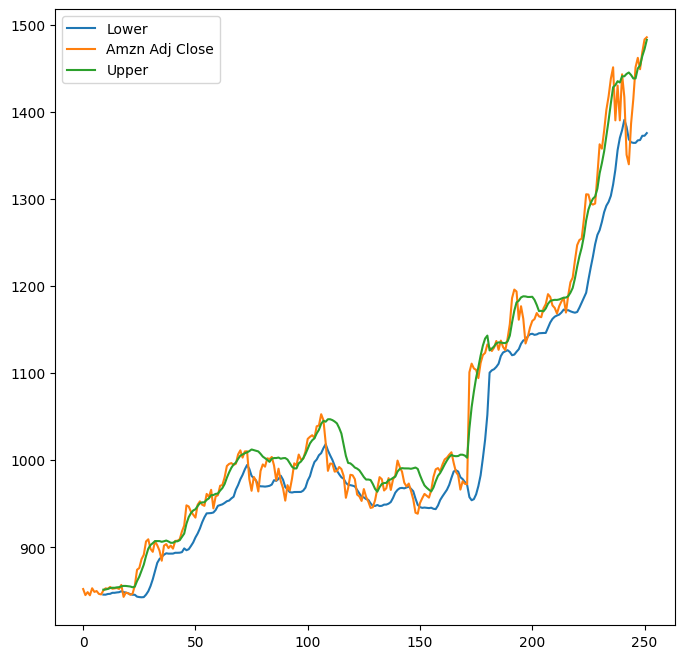

In [289]:
import matplotlib.pyplot as plt
%matplotlib inline

amzn[["Lower", "Amzn Adj Close", "Upper"]].plot(figsize=(8,8))

In [ ]:
fig = plt.figure()
ax